In [48]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

In [2]:
def heatmap_triagle(df):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        plt.figure(figsize=(10,8))
        ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, annot=True, cmap="coolwarm")

    plt.show()

In [3]:
#List of metric for classiffication models

def metrics_classific(y,predicted,X):
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
    confusion_matrix = confusion_matrix(y, predicted)
    print(confusion_matrix)
    print(classification_report(y, predicted))

    # Validation ROC-AUC score
    from sklearn.metrics import roc_auc_score
    valid_score = roc_auc_score(y, predicted)
    print('Validation ROC-AUC score:', valid_score)

    # AUC score
    from sklearn.metrics import  auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, predicted)
    auc = auc(false_positive_rate, true_positive_rate)
    print('Validation AUC score:    ', auc)
    print("Accuracy: %.2f%%" % (accuracy_score(y, predicted) * 100.0))

## presenting the data

In [176]:
df00 = pd.read_csv(r'C:\Users\Dikla\Desktop\datascience\winequalityN.csv')

In [177]:
# show the table
df00.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,white,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,white,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,white,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,white,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
5,white,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
6,white,6.20,0.32,0.16,7.00,0.04,30.00,136.00,0.99,3.18,0.47,9.60,6
7,white,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
8,white,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
9,white,8.10,0.22,0.43,1.50,0.04,28.00,129.00,0.99,3.22,0.45,11.00,6


In [174]:
df00.shape

(6497, 13)

* 
## check if ther are columns with no numeric data 
* 
## check null columns

In [5]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [200]:
df01.isna().sum() 

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### there are some null values as we can see. we can erase them because it dose not affect the values significantly.
### we'll address this later

###### swiches between columns and rows

In [7]:
df00.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
type,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white
fixed acidity,7,6.3,8.1,7.2,7.2,8.1,6.2,7,6.3,8.1,8.1,8.6,7.9,6.6,8.3
volatile acidity,0.27,0.3,0.28,0.23,0.23,0.28,0.32,0.27,0.3,0.22,0.27,0.23,0.18,0.16,0.42
citric acid,0.36,0.34,0.4,0.32,0.32,0.4,0.16,0.36,0.34,0.43,0.41,0.4,0.37,0.4,0.62
residual sugar,20.7,1.6,6.9,8.5,8.5,6.9,7,20.7,1.6,1.5,1.45,4.2,1.2,1.5,19.25
chlorides,0.045,0.049,0.05,0.058,0.058,0.05,0.045,0.045,0.049,0.044,0.033,0.035,0.04,0.044,0.04
free sulfur dioxide,45,14,30,47,47,30,30,45,14,28,11,17,16,48,41
total sulfur dioxide,170,132,97,186,186,97,136,170,132,129,63,109,75,143,172
density,1.001,0.994,0.9951,0.9956,0.9956,0.9951,0.9949,1.001,0.994,0.9938,0.9908,0.9947,0.992,0.9912,1.0002
pH,3,3.3,3.26,3.19,3.19,3.26,3.18,3,3.3,3.22,2.99,3.14,3.18,3.54,2.98


In [8]:
df00.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


***
## devision into wine type

In [9]:
df00.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:
df01 = df00.copy()

* 
### change all object lables to nunmeric = red wine = 0 , white wine = 1
* 
### numbers 0,1 are randome division.

In [12]:
#from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df01['type']=encoder.fit_transform(df00['type'])

In [13]:
df01.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df01.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [201]:
df02 = df01.dropna() # erase the null values to continue and save the changes into new df variable

#### now we can see there is no more 'object'  type of columns.
#### now all of our data is numeric

In [16]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int32  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 681.6 KB


In [173]:
#sns.pairplot(df02)

In [18]:
# heatmap_triagle(df02)

In [20]:
df03 = df02.copy()

### find how many duplicates we have

In [21]:
df03.duplicated().sum()

1168

### find how many duplicates of each type of wine

In [22]:
df03['type'].loc[df02.duplicated()==1].value_counts()

1    928
0    240
Name: type, dtype: int64

##### Looking for duplicates in the dataset, reveals 1168 records marked as duplicates, almost 20% of the data. The original introduction of this dataset has 4898 records. Our Kaggle dataset contains 6497 records. We have decided to keep the duplicates, since part of the challenge in this project is to deal with imbalanced data, and the current setting of the data support this purpose.

# type of wine

###### There are two types of wines - red wine and white wine.

* 
######   There are no null values

* 
###### The two type of wine are divided 75%-25% (white/red)

In [23]:
# 0 - for red wine
# 1- for white wine
df02.groupby('type')['quality'].count().to_frame()

,quality
type,
0,1593
1,4870


### visualization of the type division

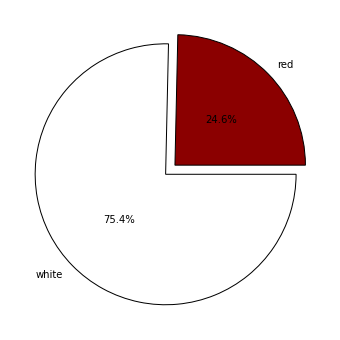

In [24]:
# explode=[0.05]*2 - how 'out' I want the slice to be
# pctdistance - where thw lables located. for higher then 0.5 whill be closer to the edge anf for lower
#               then 0.5 will be closer to the center
# data - the data from above
# X - the wedge (opening of the slice) size
# autopct="%.1f%%" - the numeric lable -  number of digits after the dot
# 
data = df02.groupby('type')['quality'].count()
fig, ax = plt.subplots(figsize=[10,6])
labels = ['red','white']
ax = plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['darkred','white'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)
plt.show()

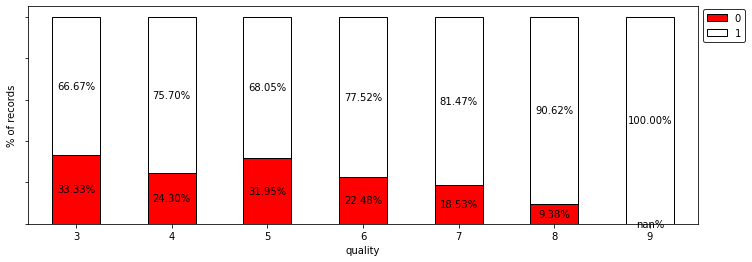

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
pd.options.display.float_format = '{:,.2f}'.format

bar_chart = df02.groupby(['type','quality'])['quality'].count().unstack('type')
bar_chart= (bar_chart.T/bar_chart.T.sum()).T
ax = bar_chart.plot(kind='bar', stacked=True, color=['r','w'], edgecolor='black', ax=ax)

labels = []
for j in bar_chart.columns:
    for i in bar_chart.index:
          label = str('{0:.2%}'.format(bar_chart.loc[i][j]))
          labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='black')

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(labels='')
ax.set_ylabel('% of records')
plt.legend(bbox_to_anchor = (1, 1.01), edgecolor='black')
plt.show()


#### we can see the higher the quality of the wine - the less red wine records.
#### of course we have 75% more white wine, but also we can see the white winen in general has better quality.
#### the most recrords precent of red wine is from '3' quality rate.

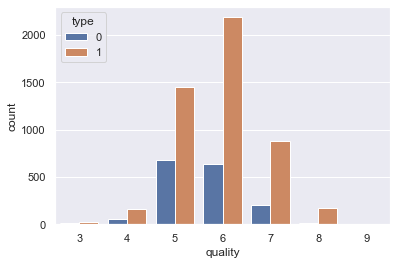

In [188]:
sns.set(style="darkgrid")
sns.countplot(df02["quality"],hue="type",data=df02)
plt.show()

In [197]:
y = df02.type 
X = df02.drop(['type'],axis=1)

In [198]:
y.value_counts()

1    4870
0    1593
Name: type, dtype: int64

  ***
# modeling
### Split the data

In [31]:
#from sklearn.model_selection import train_test_split
# split the data using 20% test and stratify according to quality distribution
# stratify - Maintains proportions of the original model during the test
# random state - number of shuffle before returning the train and test. mantain the same result all the time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=116)

In [32]:
y_train.value_counts()

1    3896
0    1274
Name: type, dtype: int64

In [33]:
y_test.value_counts()

1    974
0    319
Name: type, dtype: int64

In [36]:
#see numerical division between train and test
y.shape, y_train.shape, y_test.shape

((6463,), (5170,), (1293,))

# KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
knn_prediction = knn.predict(X_test)

In [39]:
#metrics.confusion with the def on the top
metrics_classific(y_test,knn_prediction,X_test)

[[279  40]
 [ 20 954]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       319
           1       0.96      0.98      0.97       974

    accuracy                           0.95      1293
   macro avg       0.95      0.93      0.94      1293
weighted avg       0.95      0.95      0.95      1293

Validation ROC-AUC score: 0.9270371347833644
Validation AUC score:     0.9270371347833644
Accuracy: 95.36%


In [40]:
X_test.shape

(1293, 12)

In [41]:
y_test.value_counts()

1    974
0    319
Name: type, dtype: int64

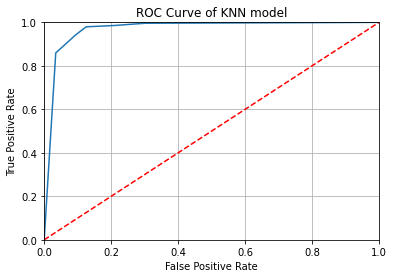

In [42]:
y_pred_prob = knn.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN model')
plt.grid(True)


In [213]:

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns
# Changing the read file location to the location of the file   
y = df02['type'] 
X = df02.drop('diagnosis', axis = 1) 
X = X.drop('Unnamed: 32', axis = 1) 
X = X.drop('id', axis = 1) 
# Separating the dependent and independent variable 
  
X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size = 0.3, random_state = 0) 
# Splitting the data into training and testing data  

KeyError: "['diagnosis'] not found in axis"

In [207]:

strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='M') 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score) 

NameError: name 'DummyClassifier' is not defined